In [112]:
import d2d
import importlib
importlib.reload(d2d)
import numpy as np
import tensorflow as tf
import pandas as pd
import random
import os
# os.environ['TF_DETERMINISTIC_OPS'] = '1'
%matplotlib notebook

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [113]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

In [119]:
SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

linear_model, lstm_model, dnn_model, df_all_chan,  input_columns  = d2d.import_data(filename = file)

da = df_all_chan.to_numpy()

window_input_width = 100

multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                input_width=window_input_width, 
                                                 label_width=1, 
                                                 shift=0,
                                                 label_columns=['Discharge'],
                                                 input_columns=input_columns,
                                                 shuffle=False,
                                                batch_size=32)

history['lstm_'+str(window_input_width)+'_'+filt] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, patience = 10)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/100
14/14 [==============================] - 2s 75ms/step - loss: 1.1796 - mean_absolute_error: 0.8481 - val_loss: 3.7620 - val_mean_absolute_error: 1.6753
Epoch 2/100
14/14 [==============================] - 1s 56ms/step - loss: 0.8059 - mean_absolute_error: 0.7130 - val_loss: 4.4290 - val_mean_absolute_error: 1.8845
Epoch 3/100
14/14 [==============================] - 1s 58ms/step - loss: 0.5677 - mean_absolute_error: 0.5721 - val_loss: 2.7954 - val_mean_absolute_error: 1.4396
Epoch 4/100
14/14 [==============================] - 1s 57ms/step - loss: 0.4386 - mean_absolute_error: 0.4948 - val_loss: 2.9560 - val_mean_absolute_error: 1.4845
Epoch 5/100
14/14 [==============================] - 1s 57ms/step - loss: 0.3690 - mean_absolute_error: 0.4466 - val_loss: 2.6828 - val_mean_absolute_error: 1.4120
Epoch 6/100
14/14 [==============================] - 1s 55ms/step - loss: 0.2941 - mean_absolute_error: 0.3891 - val_loss: 2

<IPython.core.display.Javascript object>


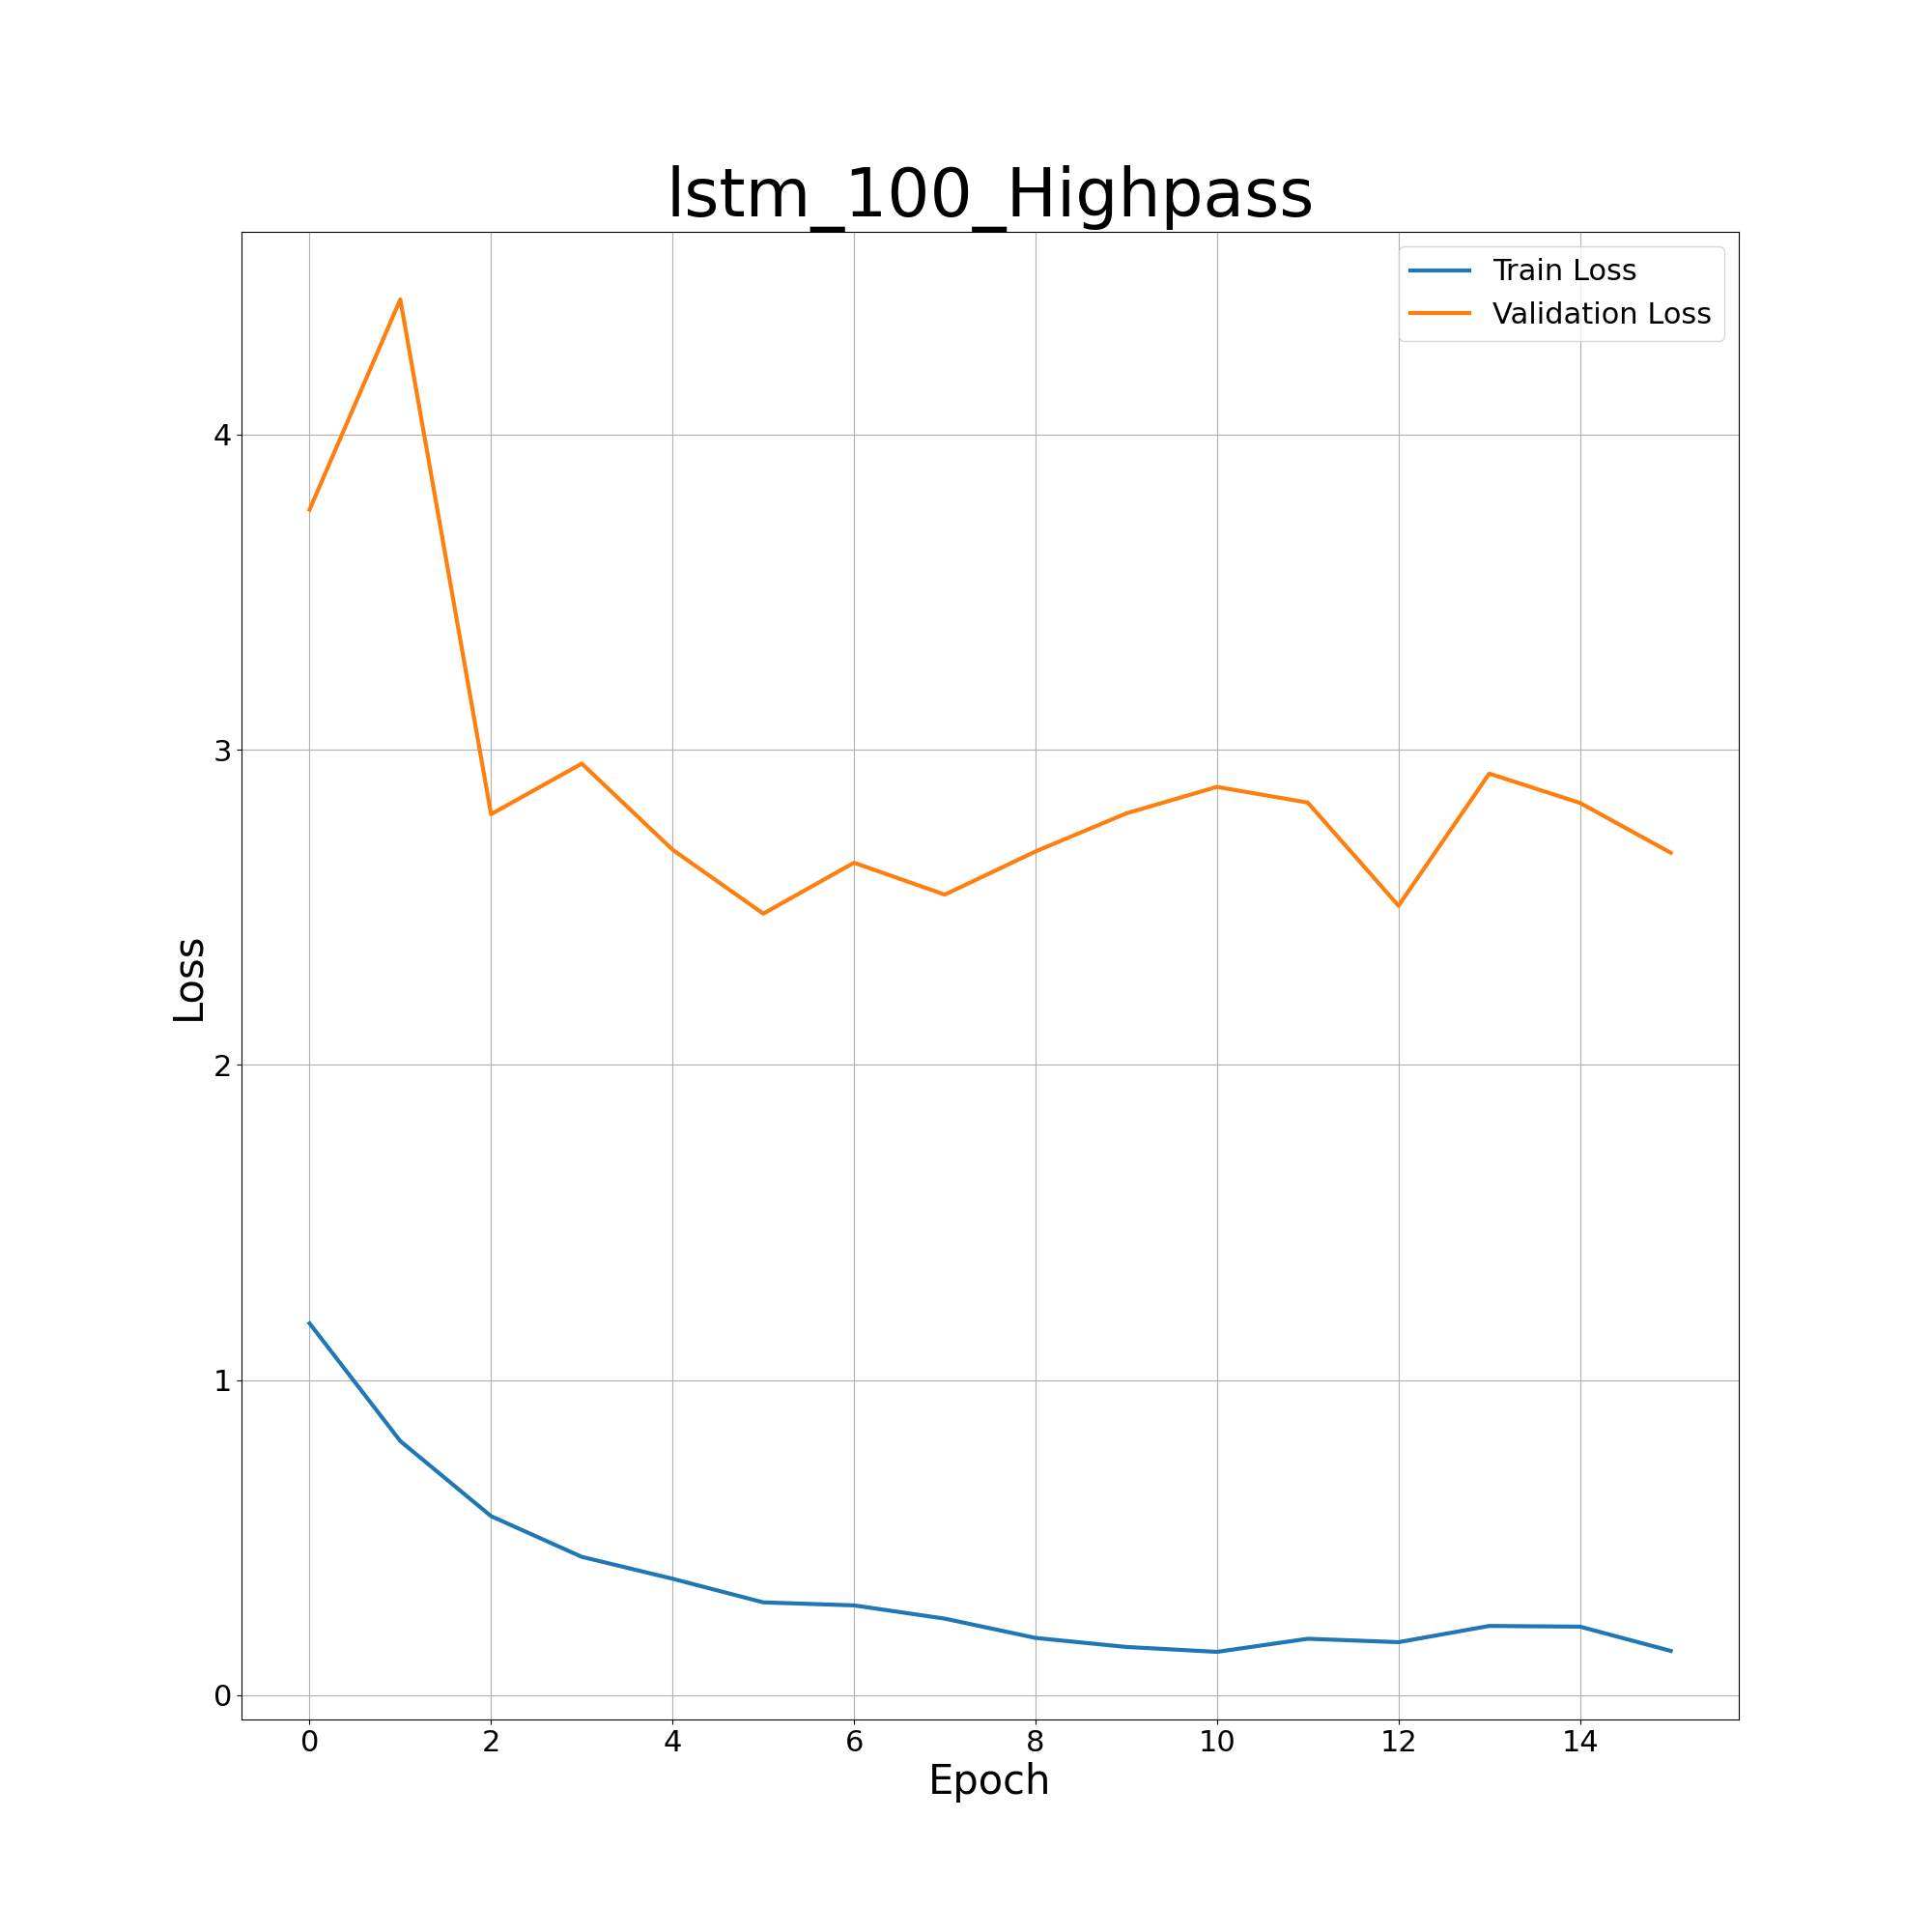

Text(0.5, 0, 'Epoch')

In [120]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(nrows=1, 
                         ncols=1, 
                         sharey=False, 
                         sharex=False,
                         figsize=(20,20))

fig.patch.set_facecolor('white')

ax.plot(history['lstm_'+str(window_input_width)+'_'+filt].history['loss'], label='Train Loss',linewidth=3)
ax.plot(history['lstm_'+str(window_input_width)+'_'+filt].history['val_loss'], label='Validation Loss',linewidth=3)
ax.grid(True)
ax.legend()
ax.set_title('lstm_'+str(window_input_width)+'_'+filt ,size=50)
ax.set_ylabel('Loss', size=30)
ax.set_xlabel('Epoch', size=30)

In [121]:
lstm_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (32, 32)                  299648    
_________________________________________________________________
dense_21 (Dense)             (32, 1)                   33        
Total params: 299,681
Trainable params: 299,681
Non-trainable params: 0
_________________________________________________________________


In [122]:
units=32 #found in the layer compile and model creation e.g. .LSTM(units)
weights = lstm_model.layers[0].get_weights()[0]

input_gate = weights[:, :units]
forget_gate = weights[:, units: units * 2]
cell_state = weights[:, units * 2: units * 3]
output = weights[:, units * 3:]

print(weights.shape)
weights

(2308, 128)


array([[-0.027144  ,  0.04506511, -0.00030104, ..., -0.0233758 ,
         0.01086795, -0.04257612],
       [ 0.03882783, -0.02773369,  0.0028157 , ..., -0.02228561,
         0.03839262, -0.05506489],
       [-0.01842388, -0.00716187,  0.00682753, ..., -0.01367225,
         0.05995191, -0.01622357],
       ...,
       [-0.05983347, -0.0525889 , -0.00448098, ..., -0.03578579,
        -0.0244981 ,  0.0063831 ],
       [-0.05195753,  0.01641959, -0.0256725 , ..., -0.07232966,
        -0.03333766, -0.04886019],
       [-0.03229532,  0.04125329,  0.00933045, ..., -0.00865528,
         0.03551543, -0.05818402]], dtype=float32)

In [63]:
# weights.shape

# df_weights = pd.DataFrame(weights).transpose()
# df_weights

In [87]:
print(weights.max())

0.117722675


<IPython.core.display.Javascript object>


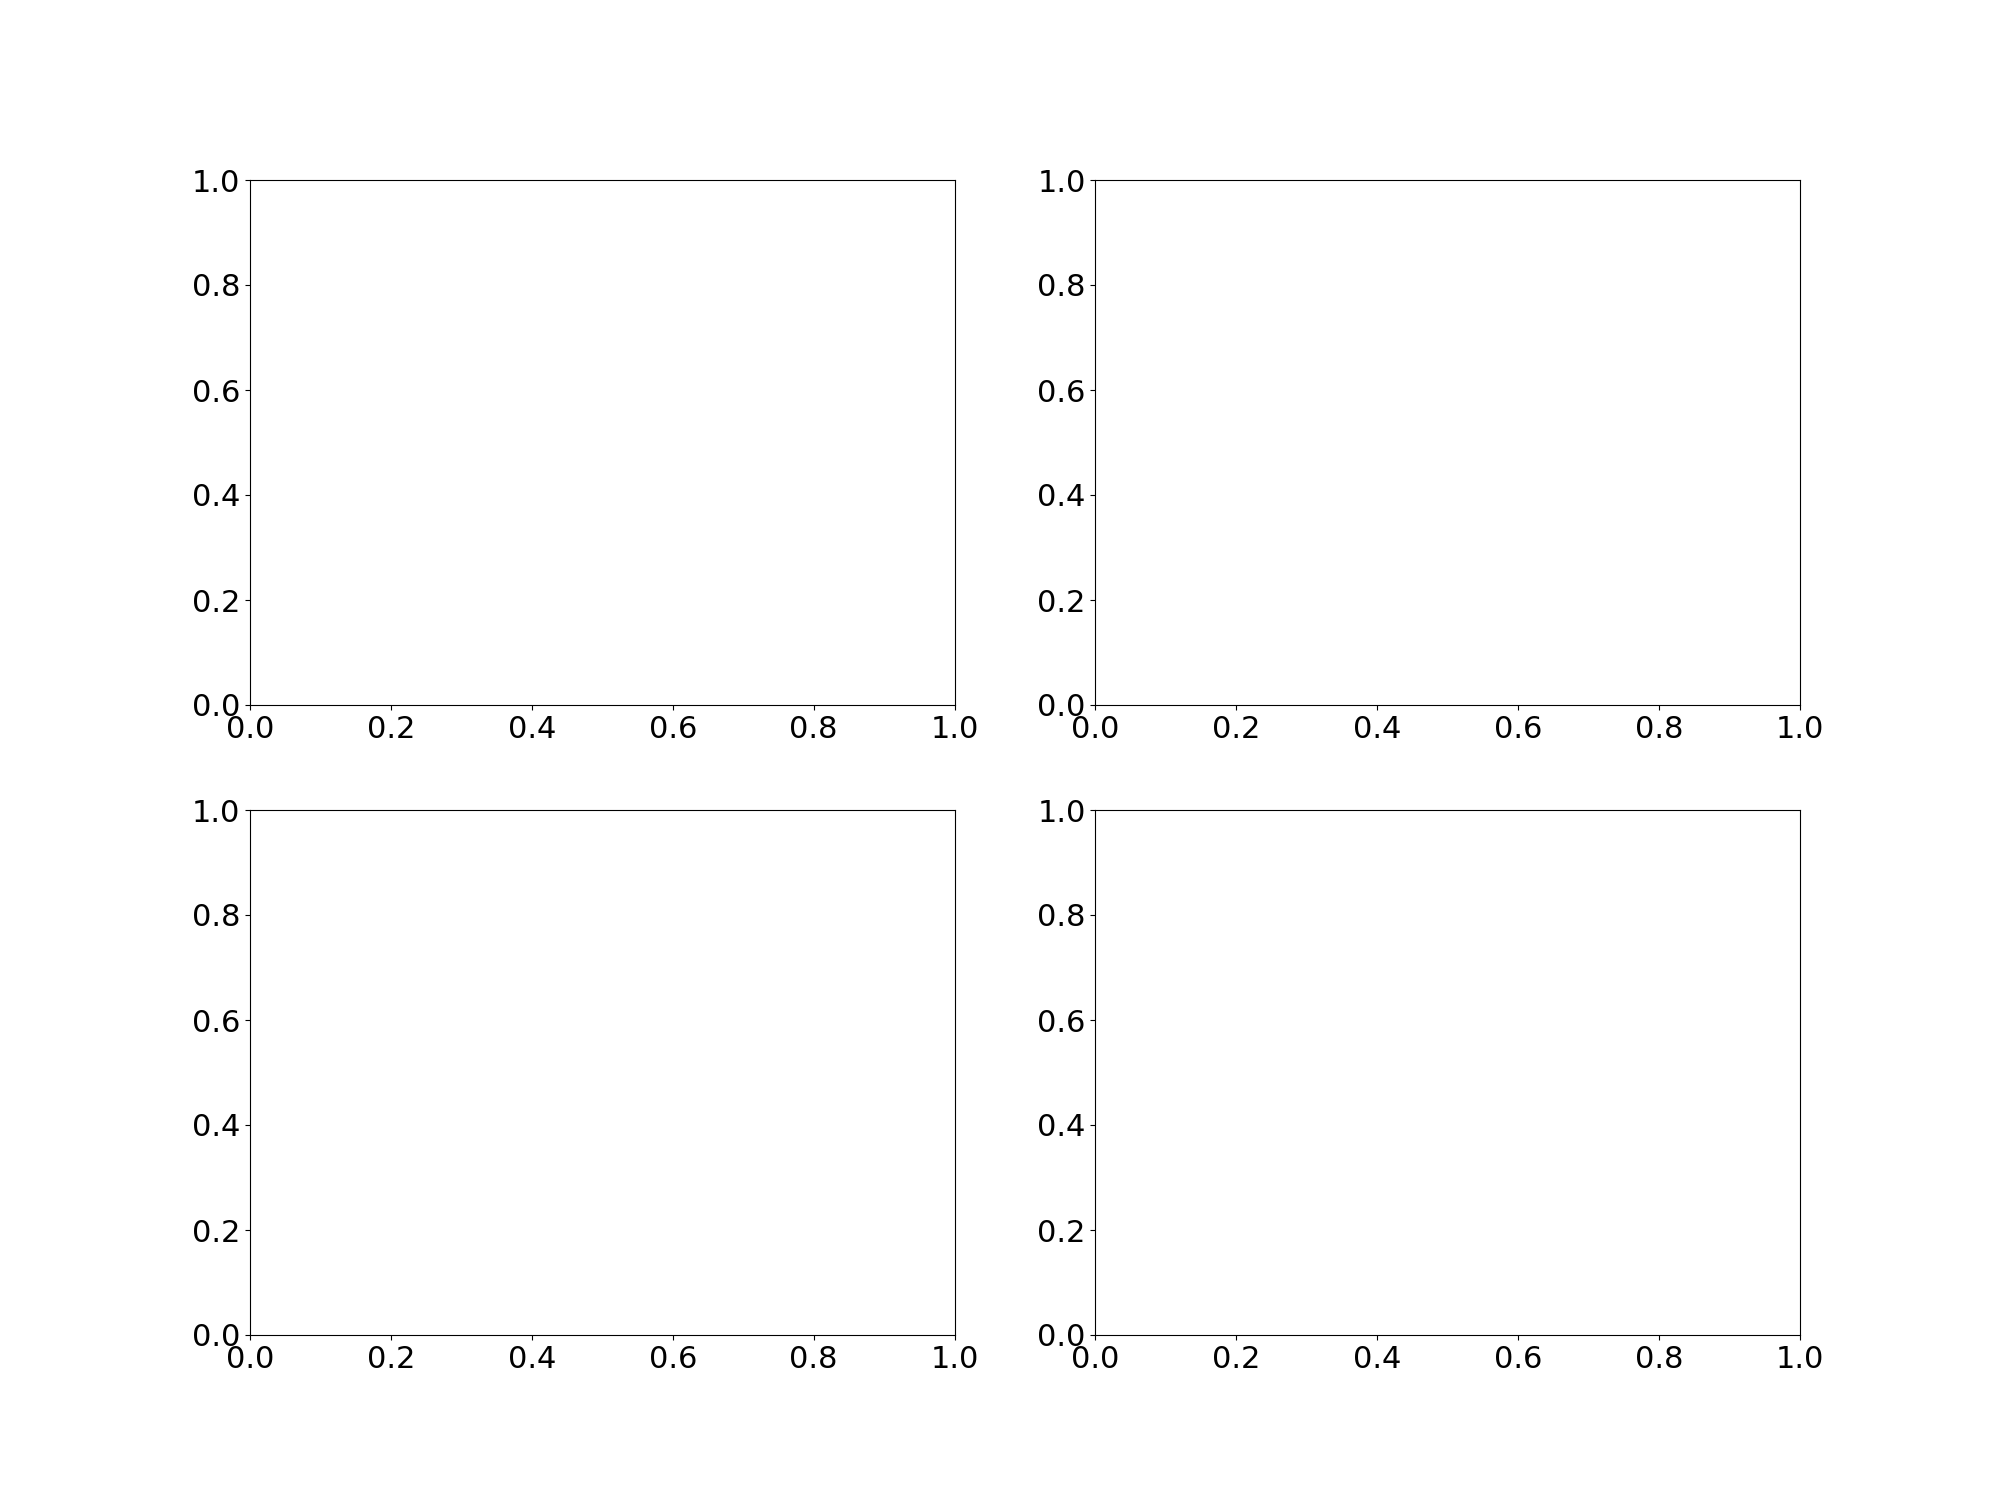

TypeError: cannot unpack non-iterable Figure object

In [131]:
( (fig0, fig1), (fig2, fig3)) ,( (ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2,ncols=2,figsize=[20,15])

image0 = ax0.pcolor(input_gate)
cbar0 = fig0.colorbar(image0)

image1 = ax1.pcolor(forget_gate)
cbar1 = fig1.colorbar(image1)

image2 = ax2.pcolor(cell_state)
cbar2 = fig2.colorbar(image2)

image3 = ax3.pcolor(output)
bar3 = fig3.colorbar(output)


ax0.set_ylabel('Channels')
ax0.set_xlabel('LSTM Unit')

ax0.set_title('Input Weights')
ax1.set_title('Forget Gate')
ax2.set_title('Cell State')
ax3.set_title('Output')

plt.tight_layout()
plt.show()




In [35]:
df_weights.shape
num_of_frames = np.arange(0,df_weights.shape[0])

In [36]:
df_weights.iloc[0].values

array([-0.027144  ,  0.03882783, -0.01842388, ..., -0.05983347,
       -0.05195753, -0.03229532], dtype=float32)

<IPython.core.display.Javascript object>


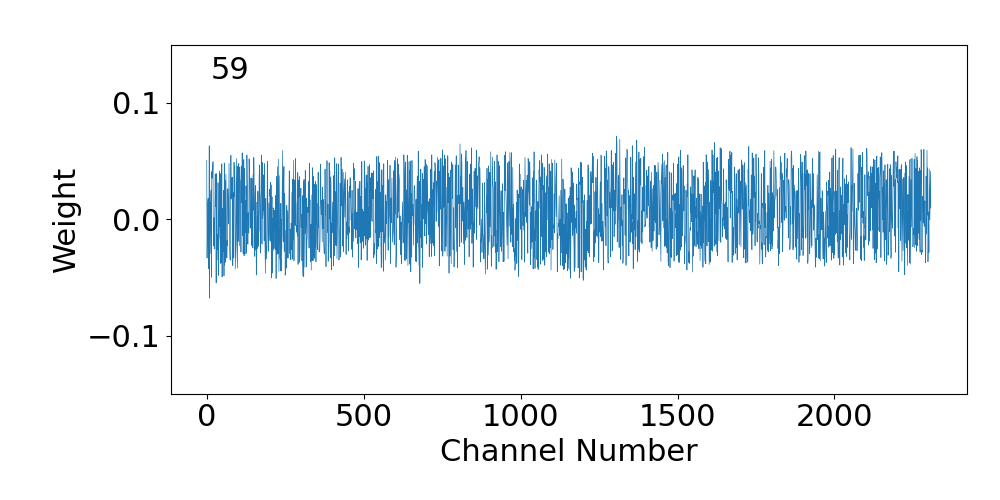

MovieWriter ffmpeg unavailable; using Pillow instead.


In [57]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=[10,5])

x = np.arange(0, 2308)
line, = ax.plot(x, df_weights.iloc[0].values, linewidth=0.5)
weight_label = ax.text(0.05, .90,'',transform=ax.transAxes)

ax.set_ylabel('Weight')
ax.set_xlabel('Channel Number')
ax.set_ylim([-0.15,0.15])
plt.tight_layout()

def animate(i):
    line.set_ydata(df_weights.iloc[i].values) # update the data.
    weight_label.set_text(i)
    return line, weight_label


ani = animation.FuncAnimation(
    fig, animate,frames=num_of_frames, interval=400, blit=True)

# To save the animation, use e.g.

ani.save("weights_viz_.gif")

# or

# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

In [232]:
# for col, i in zip(df_weights, list(range(0, 2308,1))):
#     plt.scatter([i]*len(df_weights[col]), df_weights[col])

# plt.yscale('log')

In [352]:
multi_step_window_no_shuffle = d2d.WindowGenerator(df_all_chan,
    input_width=window_input_width, label_width=1, shift=0,
    label_columns=['Discharge'],
    input_columns=input_columns,
    shuffle=False)

/home/jmanos/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [353]:
train_data = []
for i in multi_step_window_no_shuffle.train.as_numpy_iterator():
    train_data.append(i[0])

In [354]:
print(len(train_data))
train_data = np.asarray(train_data)

train_data = np.reshape(train_data, (train_data.shape[0]*train_data.shape[1], 5, 2308))

28


ValueError: cannot reshape array of size 103398400 into shape (448,5,2308)

In [ ]:
pred_on_test = lstm_model.predict(multi_step_window_shuffled.test)
pred_on_test

In [ ]:
true_dis_test = []

for i in multi_step_window_shuffled.test.as_numpy_iterator():
    true_dis_test.append(i[1])

true_dis_test = np.asarray(true_dis_test)
true_dis_test = true_dis_test.squeeze()

In [ ]:
plt.figure(figsize = (15,15), facecolor = 'white')
plt.scatter(pred_on_test, true_dis_test)
#plt.plot([-1.5, 1.5], [-1.5, 1.5])
#plt.ylim([-1.5, 1.5])
#plt.xlim([-1.5, 1.5])
plt.ylabel('True Discharge (std. units)')
plt.xlabel('Predicted Discharge (std. units)')

In [ ]:
predictions_test_set = (pred_on_test * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean
discharge_test_set = (true_dis_test * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean

In [ ]:

plt.figure(figsize = (15,15), facecolor = 'white')
plt.scatter(predictions_test_set, discharge_test_set)
# plt.plot([6,15], [6,15])
# plt.ylim([6,15])
# plt.xlim([6,15])
plt.ylabel('True Discharge ($m^3/s$)')
plt.xlabel('Predicted Discharge ($m^3/s$)')

In [ ]:
predictions = lstm_model.predict(train_data)

In [ ]:
true_dis = []

for i in multi_step_window_no_shuffle.train.as_numpy_iterator():
    true_dis.append(i[1])

In [ ]:
true_dis = np.asarray(true_dis)
true_dis = np.reshape(true_dis, (8784, 1, 1))
true_dis

In [ ]:
predictions

In [ ]:
true_dis = true_dis.squeeze()

In [ ]:
multi_step_window_shuffled.dis_std

In [ ]:
pred = (predictions * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean
true_discharge = (true_dis * multi_step_window_shuffled.dis_std) + multi_step_window_shuffled.dis_mean

plt.figure(figsize = (20,15), facecolor = 'white')
plt.plot(pred, label = 'Predictions')
plt.plot(true_discharge, label = 'Truth')
plt.ylabel('Discharge $(m^3/s)$')
plt.xlabel('Timestep')
plt.legend()
plt.show()

In [ ]:
plot_range = [3,21]
plt.figure(figsize = (15,15), facecolor = 'white')
plt.scatter(pred, true_discharge)
plt.plot(plot_range, plot_range)
plt.ylim(plot_range)
plt.xlim(plot_range)
plt.ylabel('True Discharge ($m^3/s$)')
plt.xlabel('Predicted Discharge ($m^3/s$)')


In [ ]:
mean_off = np.mean(np.absolute(predictions - true_dis))

In [205]:
mean_off

0.9900706